# 2.2 Cholesky factorization

Let $A$ be a real symmetric positive definite matrix. Then, a unique real lower triangular matrix B with positive diagonal entries exists such that 
$$A = BB^∗,$$
where $B^*$ denotes the conjugate transpose of $B$.

Furthermore, We have,

\begin{align*}
\begin{bmatrix}a_{11} & a_{12} & \dots & a_{1n} \\ a_{21} & a_{22} & \dots & a_{2n} \\
\vdots & \vdots &   & \vdots \\ a_{n1} & a_{n2} & \dots & a_{nn} \end{bmatrix}=
\begin{bmatrix}b_{11} & 0 & \dots & 0 \\ b_{21} & b_{22} & \dots & 0 \\
\vdots & \vdots &   & \vdots \\ b_{n1} & b_{n2} & \dots & b_{nn} \end{bmatrix}
\begin{bmatrix}b_{11} & b_{12} & \dots & b_{1n} \\ 0 & b_{22} & \dots & b_{2n} \\
\vdots & \vdots &   & \vdots \\ 0 & 0 & \dots & b_{nn} \end{bmatrix}.
\end{align*}
Solving this system, $b_{ij}$ can be identified as follows

\begin{align*}
b_{j,j} &={\sqrt {a_{j,j}-\sum _{k=1}^{j-1}b_{j,k}^{2}}},\\
b_{i,j}&={\frac {1}{a_{j,j}}}\left(a_{i,j}-\sum _{k=1}^{j-1}b_{i,k}b_{j,k}\right)\quad {\text{for }}i>j.
\end{align*}

See [1] for the full derivation of this algorithm. Furthermore, we can prepare a Python code using the above algorithm.

In [1]:
import numpy as np
import pandas as pd
def myCholesky(A):

    '''
    Assuming that the matrix A is symmetric and positive definite,
    this function computes a lower triangular matrix G with positive
    diagonal entries, such that A = GG^t
    Input: A the nxn matrix to be factorized
    n the number of rows and columns A has
    Output: B the nxn lower triangular matrix with positive
    entries on its main diagonal

    '''
    n = A.shape[1]
    # allocate space for the matrix B
    B = np.zeros([n, n], dtype=float);
    # define the first column of B
    B[0,0] = np.sqrt(A[0,0]);
    B[1:n, 0]= A[1:n,0] / B[0,0];
    # loop through the columns of B from 2nd to last
    for j in range(1, n):
        # define the jth diagonal entry of B
        B[j,j] = np.sqrt(A[j,j]- np.dot(B[j, 0:j], B[j, 0:j]))
        for i in range(j+1, n):
            B[i,j]=(A[i,j] - np.dot(B[i, 0:j],B[j, 0:j]))/B[j,j]
    return B        


<font color='Blue'><b>Example</b></font>: Apply $LU$ decomposition on the following matrix.
$$A = \left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]$$

We have,

<IPython.core.display.Latex object>

array([[ 7,  3, -1,  2],
       [ 3,  8,  1, -4],
       [-1,  1,  4, -1],
       [ 2, -4, -1,  6]])

<IPython.core.display.Latex object>

array([[ 2.64575131,  0.        ,  0.        ,  0.        ],
       [ 1.13389342,  2.59119388,  0.        ,  0.        ],
       [-0.37796447,  0.55131785,  1.88499111,  0.        ],
       [ 0.75592895, -1.87448068,  0.16931058,  1.37339999]])

<IPython.core.display.Latex object>

array([[ 7.,  3., -1.,  2.],
       [ 3.,  8.,  1., -4.],
       [-1.,  1.,  4., -1.],
       [ 2., -4., -1.,  6.]])

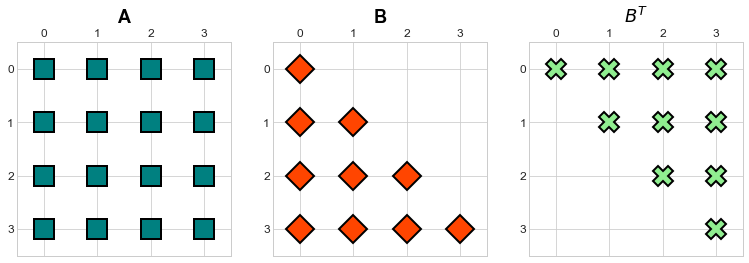

In [2]:
from IPython.display import display, Latex
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
B = myCholesky(A)
display(Latex(r'A ='))
display(A)
display(Latex(r'B ='))
display(B)
display(Latex(r'B  B^T ='))
display(np.matmul(B,B.T))

import scipy.sparse as sps

## matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon
from matplotlib.font_manager import FontProperties

# plt setting
plt.style.use('seaborn-whitegrid')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['text.color'] = 'k'
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 4))
ax = ax.ravel()
font = FontProperties()
font.set_weight('bold')
_ = ax[0].spy(sps.csr_matrix(A), aspect='equal', markersize= 20, color = 'Teal', markeredgecolor = 'Black',
              markeredgewidth = 2)
_ = ax[0].set_title('A', fontproperties=font, fontsize = 18)
_ = ax[1].spy(sps.csr_matrix(B), aspect='equal', markersize= 20, color = 'OrangeRed', markeredgecolor = 'Black',
              marker ='D', markeredgewidth = 2)
_ = ax[1].set_title('B', fontproperties=font, fontsize = 18)
_ = ax[2].spy(sps.csr_matrix(B.T), aspect='equal', markersize= 20, color = 'LightGreen', markeredgecolor = 'Black',
              marker ='X', markeredgewidth = 2)
_ = ax[2].set_title(r'$B^T$', fontproperties=font, fontsize = 18)

Note that we could get a similar results using function, [```numpy.linalg.cholesky```](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html).

In [3]:
B = np.linalg.cholesky(A)
display(Latex(r'B ='))
print(B)

<IPython.core.display.Latex object>

[[ 2.64575131  0.          0.          0.        ]
 [ 1.13389342  2.59119388  0.          0.        ]
 [-0.37796447  0.55131785  1.88499111  0.        ]
 [ 0.75592895 -1.87448068  0.16931058  1.37339999]]


## 2.2.1 Solving Linear systems using Cholesky factorization

We can solve the linear system $Ax=b$ for $x$ using Cholesky factorization. To demonstrate this, we use the following example,

Let
\begin{align*}A=\left[\begin{array}{cccc} 7 & 3 & -1 & 2\\ 3 & 8 & 1 & -4\\ -1 & 1 & 4 & -1\\ 2 & -4 & -1 & 6 \end{array}\right]
\quad \text{and}\quad
b=\left[\begin{array}{c} 7\\ 1\\ 11\\ 15 \end{array}\right].\end{align*}
Then, this linear system can be also expressed as

\begin{align*}
Ax=(BB^T)x=B(B^Tx)=b,
\end{align*}

we have,

In [4]:
A = np.array([ [7, 3, -1, 2], [3, 8, 1, -4], [-1, 1, 4, -1], [2, -4, -1, 6] ])
b = np.array([[7],[1],[11],[15]])
B = np.linalg.cholesky(A)
display(Latex(r'B ='))
print(B)

<IPython.core.display.Latex object>

[[ 2.64575131  0.          0.          0.        ]
 [ 1.13389342  2.59119388  0.          0.        ]
 [-0.37796447  0.55131785  1.88499111  0.        ]
 [ 0.75592895 -1.87448068  0.16931058  1.37339999]]


Now we can solve the following linear systems instead
$$\begin{cases}
By=b,\\
B^Tx=y.
\end{cases}$$

In [5]:
# solving Ly=b for y
y = np.linalg.solve(B, b)
display(Latex(r'y ='))
print(y)

<IPython.core.display.Latex object>

[[ 2.64575131]
 [-0.77184498]
 [ 6.5918252 ]
 [ 7.59947997]]


In [6]:
# solving B^Tx=y for x
x = np.linalg.solve(B.T, y)
display(Latex(r'x ='))
print(x)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


Let's now solve the linear system directly and compare the results.

In [7]:
x1 = np.linalg.solve(A, b)
display(Latex(r'x ='))
print(x1)

<IPython.core.display.Latex object>

[[-1.46666667]
 [ 3.06666667]
 [ 3.        ]
 [ 5.53333333]]


***
# References
1. Allaire, Grégoire, et al. Numerical linear algebra. Vol. 55. New York: Springer, 2008.
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. Khoury, Richard, and Douglas Wilhelm Harder. Numerical methods and modelling for engineering. Springer, 2016.
***